In [1]:
from analysis_utils import *
import numpy as np
%load_ext autoreload
import pandas as pd
ptRNA = pd.read_excel('tRNAValues.xlsx',header=None)
gr07_ptRNA=ptRNA[1]

pCodon = pd.read_excel('codonValues.xlsx',header=None)
gr07_pCodon = pCodon[1]

In [2]:
#0.003365317575147734
#0.08
print(np.sqrt(6*56*0.00336/1000))

0.0336


In [3]:
%autoreload

path = "/Users/Akshay/Documents/TranslationDynamics/data/"

data = "191204_2146/"
gr_sim = dict()

for i in range(1,2):
    sim_i = computeTransportRxnTimes(path+data, 1e15, 1e15, 100*(i-1),100*(i-1)+900,scaling=200)
    gr_sim[i] = (CellLatencies(sim_i))
    transport_times = np.array(sim_i[0])*1000/1608733
    reaction_times = (np.array(sim_i[1])*1000/1608733)
    search_times = (np.array(sim_i[5])*1000/1608733)

reaction_times_exp = list()
elongation_times_exp = list()
np.random.seed(0)
for i in range(3000):
    reaction_times_exp.append(np.random.choice([times[0] for times in reaction_times])+np.random.exponential((1000/1475+1000/1529+1000/209+1000/200+1000/32)))
    elongation_times_exp.append(np.random.choice([times[0] for times in search_times])+np.random.exponential((1000/1475+1000/1529+1000/209+1000/200+1000/32)))


Computing...
missing expt
413
missing expt
503


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0.7531240388576194
41.46141907823647


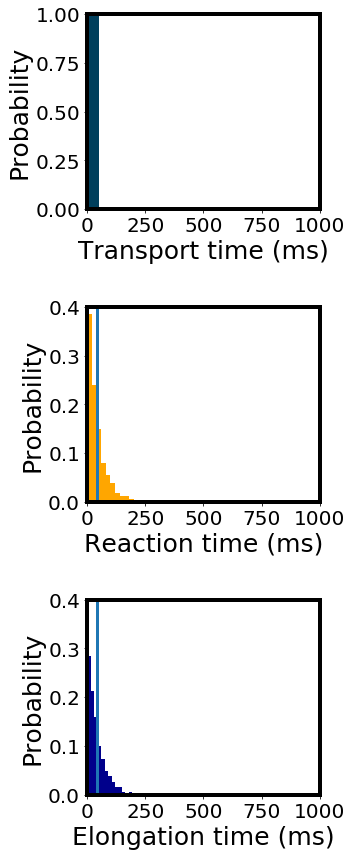

In [4]:
from IPython.core.display import display, HTML
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl

%matplotlib inline
%load_ext autoreload
%autoreload

fig,[ax1,ax2,ax3] = plt.subplots(3,1,figsize=(5,12))
transport_hist = np.histogram([times[0] for times in transport_times],bins=20,range=(0,1000))
ax1.bar(transport_hist[1][0:-1],transport_hist[0]/sum(transport_hist[0]),align='edge',width=1000/20,color='#003f5c')

ax1.set_xlim(0,1000)
ax1.set_ylim(0,1)
ax1.set_ylabel('Probability',size=25)
ax1.set_xlabel('Transport time (ms)',size=25)
ax1.plot([np.average([times[0] for times in transport_times])]*2,[0,0.4],linewidth=3)
print(np.average([times[0] for times in transport_times]))


reaction_hist = np.histogram(reaction_times_exp,bins=20,range=(0,400))

ax2.bar(reaction_hist[1][0:-1],reaction_hist[0]/sum(reaction_hist[0]),align='edge',width=400/20,color='#ffa600')
ax2.set_xlim(0,1000)
ax2.set_ylim(0,0.4)
ax2.set_ylabel('Probability',size=25)
ax2.set_xlabel('Reaction time (ms)',size=25)
ax2.plot([np.average(reaction_times_exp)]*2,[0,0.4],linewidth=3)
print(np.average(reaction_times_exp))

elongation_hist = np.histogram(elongation_times_exp,bins=20,range=(0,300))

ax3.bar(elongation_hist[1][0:-1],elongation_hist[0]/sum(elongation_hist[0]),align='edge',width=300/20,color='darkblue')
ax3.set_xlim(0,300)
ax3.set_ylim(0,0.4)
ax3.set_ylabel('Probability',size=25)
ax3.set_xlabel('Elongation time (ms)',size=25)
ax3.plot([np.average(elongation_times_exp)]*2,[0,0.4],linewidth=3)


for _,axes in enumerate([ax1,ax2,ax3]):
    axes.spines['left'].set_linewidth(4)
    axes.spines['bottom'].set_linewidth(4)
    axes.spines['top'].set_linewidth(4)
    axes.spines['right'].set_linewidth(4)
    axes.tick_params(axis='both', which='major', labelsize=20)
    axes.set_xticks(np.arange(0, 1001, 250))


plt.tight_layout()
plt.subplots_adjust(hspace=0.5)


In [10]:
path = "/Users/Akshay/Documents/TranslationDynamics/data/"

data = "191204_2044/"
gr_sim = dict()

for i in range(1,2):
    sim_i = computeTransportRxnTimes(path+data, 1e15, 1e15, 100*(i-1),100*(i-1)+900,scaling=200, NR_scaling = {'k1r':1/10000000,'k2f':10000000,'k2r_nr':10000000,'k3_nr':10000000,'k4':10000000})
    gr_sim[i] = (CellLatencies(sim_i))
    transport_times = np.array(sim_i[0])*1000/1608733
    reaction_times = (np.array(sim_i[1])*1000/1608733)
    search_times = (np.array(sim_i[5])*1000/1608733)
reaction_times_exp = list()
elongation_times_exp = list()
np.random.seed(0)

for i in range(3000):
    reaction_times_exp.append(np.random.choice([times[0] for times in reaction_times])+np.random.exponential((1000/1475+1000/1529+1000/209+1000/200+1000/32)))
    elongation_times_exp.append(np.random.choice([times[0] for times in search_times])+np.random.exponential((1000/1475+1000/1529+1000/209+1000/200+1000/32)))

Computing...


/Users/akshay/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/akshay/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


missing expt
434
missing expt
853


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
nan
41.675160683282115


/Users/akshay/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/akshay/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


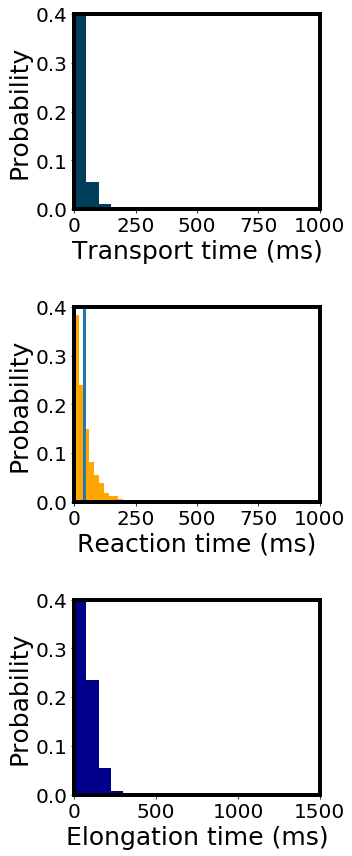

In [11]:
from IPython.core.display import display, HTML
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl

%matplotlib inline
%load_ext autoreload
%autoreload

fig,[ax1,ax2,ax3] = plt.subplots(3,1,figsize=(5,12))
transport_hist = np.histogram([times[0] for times in transport_times],bins=20,range=(0,1000))

ax1.bar(transport_hist[1][0:-1],transport_hist[0]/sum(transport_hist[0]),align='edge',width=50,color='#003f5c')
ax1.set_xlim(0,1000)
ax1.set_ylim(0,0.4)
ax1.set_ylabel('Probability',size=25)
ax1.set_xlabel('Transport time (ms)',size=25)
ax1.plot([np.average([times[0] for times in transport_times])]*2,[0,0.4],linewidth=3)
print(np.average([times[0] for times in transport_times]))


reaction_hist = np.histogram(reaction_times_exp,bins=20,range=(0,400))

ax2.bar(reaction_hist[1][0:-1],reaction_hist[0]/sum(reaction_hist[0]),align='edge',width=400/20,color='#ffa600')
ax2.set_xlim(0,1000)
ax2.set_ylim(0,0.4)
ax2.set_ylabel('Probability',size=25)
ax2.set_xlabel('Reaction time (ms)',size=25)
ax2.plot([np.average(reaction_times_exp)]*2,[0,0.4],linewidth=3)
print(np.average(reaction_times_exp))

elongation_hist = np.histogram(elongation_times_exp,bins=20,range=(0,1500))

ax3.bar(elongation_hist[1][0:-1],elongation_hist[0]/sum(elongation_hist[0]),align='edge',width=1500/20,color='darkblue')
ax3.set_xlim(0,1500)
ax3.set_ylim(0,0.4)
ax3.set_ylabel('Probability',size=25)
ax3.set_xlabel('Elongation time (ms)',size=25)
ax3.plot([np.average(elongation_times_exp)]*2,[0,0.4],linewidth=3)


for _,axes in enumerate([ax1,ax2,ax3]):
    axes.spines['left'].set_linewidth(4)
    axes.spines['bottom'].set_linewidth(4)
    axes.spines['top'].set_linewidth(4)
    axes.spines['right'].set_linewidth(4)
    axes.tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)

In [9]:
path = "/Users/Akshay/Documents/TranslationDynamics/data/"

data = "191204_1953/"
gr_sim = dict()

for i in range(1,2):
    sim_i = computeTransportRxnTimes(path+data, 1e15, 1e15, 100*(i-1),100*(i-1)+900,scaling=200)
    gr_sim[i] = (CellLatencies(sim_i))
    transport_times = np.array(sim_i[0])*1000/1608733
    reaction_times = (np.array(sim_i[1])*1000/1608733)
    search_times = (np.array(sim_i[5])*1000/1608733)
reaction_times_exp = list()
elongation_times_exp = list()
np.random.seed(0)

for i in range(30000):
    reaction_times_exp.append(np.random.choice([times[0] for times in reaction_times])+np.random.exponential((1000/1475+1000/1529+1000/209+1000/200+1000/32)))
    elongation_times_exp.append(np.random.choice([times[0] for times in search_times])+np.random.exponential((1000/1475+1000/1529+1000/209+1000/200+1000/32)))

Computing...


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
325.15082611984775
63.032565490298296


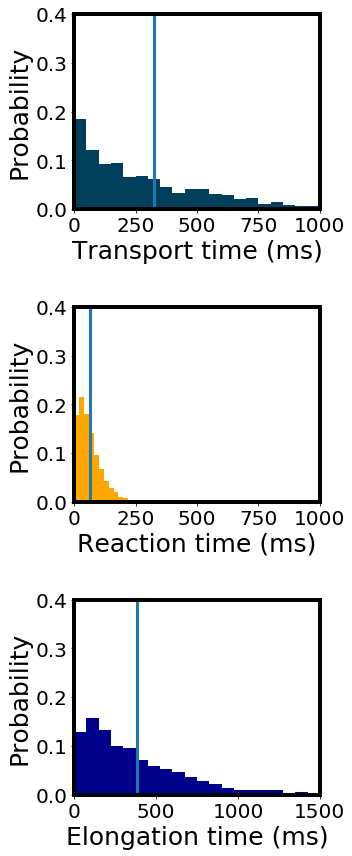

In [10]:
from IPython.core.display import display, HTML
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl

%matplotlib inline
%load_ext autoreload
%autoreload

fig,[ax1,ax2,ax3] = plt.subplots(3,1,figsize=(5,12))
transport_hist = np.histogram([times[0] for times in transport_times],bins=20,range=(0,1000))

ax1.bar(transport_hist[1][0:-1],transport_hist[0]/sum(transport_hist[0]),align='edge',width=50,color='#003f5c')
ax1.set_xlim(0,1000)
ax1.set_ylim(0,0.4)
ax1.set_ylabel('Probability',size=25)
ax1.set_xlabel('Transport time (ms)',size=25)
ax1.plot([np.average([times[0] for times in transport_times])]*2,[0,0.4],linewidth=3)
print(np.average([times[0] for times in transport_times]))

reaction_hist = np.histogram(reaction_times_exp,bins=20,range=(0,400))

ax2.bar(reaction_hist[1][0:-1],reaction_hist[0]/sum(reaction_hist[0]),align='edge',width=400/20,color='#ffa600')
ax2.set_xlim(0,1000)
ax2.set_ylim(0,0.4)
ax2.set_ylabel('Probability',size=25)
ax2.set_xlabel('Reaction time (ms)',size=25)
ax2.plot([np.average(reaction_times_exp)]*2,[0,0.4],linewidth=3)
print(np.average(reaction_times_exp))

elongation_hist = np.histogram(elongation_times_exp,bins=20,range=(0,1500))

ax3.bar(elongation_hist[1][0:-1],elongation_hist[0]/sum(elongation_hist[0]),align='edge',width=1500/20,color='darkblue')
ax3.set_xlim(0,1500)
ax3.set_ylim(0,0.4)
ax3.set_ylabel('Probability',size=25)
ax3.set_xlabel('Elongation time (ms)',size=25)
ax3.plot([np.average(elongation_times_exp)]*2,[0,0.4],linewidth=3)



for _,axes in enumerate([ax1,ax2,ax3]):
    axes.spines['left'].set_linewidth(4)
    axes.spines['bottom'].set_linewidth(4)
    axes.spines['top'].set_linewidth(4)
    axes.spines['right'].set_linewidth(4)
    axes.tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)


In [11]:
path = "/Users/Akshay/Documents/TranslationDynamics/data/"
data = "191003_2140/"
gr_sim = dict()

for i in range(1,2):
    sim_i = computeTransportRxnTimes(path+data, 1e15, 1e15, 100*(i-1),100*(i-1)+100,scaling=200)
    gr_sim[i] = (CellLatencies(sim_i))
    transport_times = np.array(sim_i[0])*1000/1608733
    reaction_times = (np.array(sim_i[1])*1000/1608733)
    search_times = (np.array(sim_i[5])*1000/1608733)
reaction_times_exp = list()
elongation_times_exp = list()
np.random.seed(0)

for i in range(30000):
    reaction_times_exp.append(np.random.choice([times[0] for times in reaction_times])+np.random.exponential((1000/1475+1000/1529+1000/209+1000/200+1000/32)))
    elongation_times_exp.append(np.random.choice([times[0] for times in search_times])+np.random.exponential((1000/1475+1000/1529+1000/209+1000/200+1000/32)))

Computing...


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
519.9794092989695
72.88304084998792


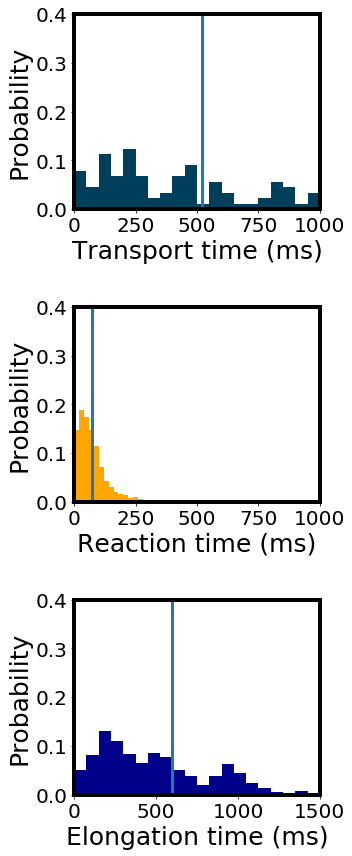

In [12]:
from IPython.core.display import display, HTML
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl

%matplotlib inline
%load_ext autoreload
%autoreload

fig,[ax1,ax2,ax3] = plt.subplots(3,1,figsize=(5,12))
transport_hist = np.histogram([times[0] for times in transport_times],bins=20,range=(0,1000))

ax1.bar(transport_hist[1][0:-1],transport_hist[0]/sum(transport_hist[0]),align='edge',width=50,color='#003f5c')
ax1.set_xlim(0,1000)
ax1.set_ylim(0,0.4)
ax1.set_ylabel('Probability',size=25)
ax1.set_xlabel('Transport time (ms)',size=25)
ax1.plot([np.average([times[0] for times in transport_times])]*2,[0,0.4],linewidth=3)
print(np.average([times[0] for times in transport_times]))


reaction_hist = np.histogram(reaction_times_exp,bins=20,range=(0,400))

ax2.bar(reaction_hist[1][0:-1],reaction_hist[0]/sum(reaction_hist[0]),align='edge',width=400/20,color='#ffa600')
ax2.set_xlim(0,1000)
ax2.set_ylim(0,0.4)
ax2.set_ylabel('Probability',size=25)
ax2.set_xlabel('Reaction time (ms)',size=25)
ax2.plot([np.average(reaction_times_exp)]*2,[0,0.4],linewidth=3)
print(np.average(reaction_times_exp))


elongation_hist = np.histogram(elongation_times_exp,bins=20,range=(0,1500))

ax3.bar(elongation_hist[1][0:-1],elongation_hist[0]/sum(elongation_hist[0]),align='edge',width=1500/20,color='darkblue')
ax3.set_xlim(0,1500)
ax3.set_ylim(0,0.4)
ax3.set_ylabel('Probability',size=25)
ax3.set_xlabel('Elongation time (ms)',size=25)
ax3.plot([np.average(elongation_times_exp)]*2,[0,0.4],linewidth=3)


for _,axes in enumerate([ax1,ax2,ax3]):
    axes.spines['left'].set_linewidth(4)
    axes.spines['bottom'].set_linewidth(4)
    axes.spines['top'].set_linewidth(4)
    axes.spines['right'].set_linewidth(4)
    axes.tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)


In [17]:
path = "/Users/Akshay/Documents/TranslationDynamics/data/"
data = "191003_2140/"
gr_sim = dict()

for i in range(1,3):
    sim_i = computeTransportRxnTimes(path+data, 1e15, 1e15, 100*(i-1),100*(i-1)+100,scaling=200)
    gr_sim[i] = (CellLatencies(sim_i))
    transport_times = np.array(sim_i[0])*1000/1608733
    reaction_times = (np.array(sim_i[1])*1000/1608733)
    search_times = (np.array(sim_i[5])*1000/1608733)
reaction_times_exp = list()
elongation_times_exp = list()
np.random.seed(0)

for i in range(3000):
    reaction_times_exp.append(np.random.choice([times[0] for times in reaction_times])+np.random.exponential((1000/1475+1000/1529+1000/209+1000/200+1000/32)))
    elongation_times_exp.append(np.random.choice([times[0] for times in search_times])+np.random.exponential((1000/1475+1000/1529+1000/209+1000/200+1000/32)))

Computing...


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
512.9021513888016
76.76589965915937


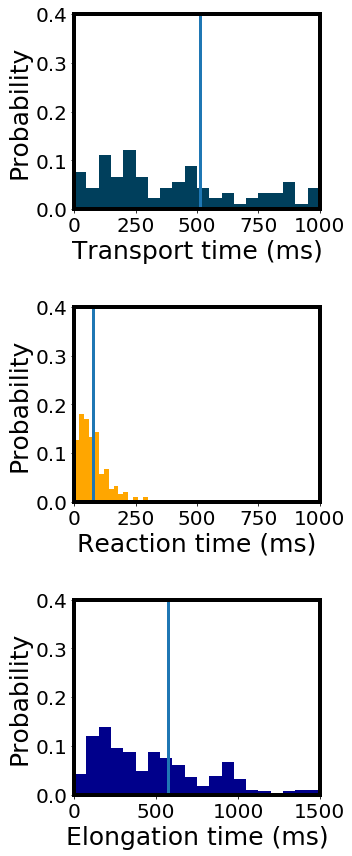

In [18]:
from IPython.core.display import display, HTML
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl

%matplotlib inline
%load_ext autoreload
%autoreload

fig,[ax1,ax2,ax3] = plt.subplots(3,1,figsize=(5,12))
transport_hist = np.histogram([times[0] for times in transport_times],bins=20,range=(0,1000))

ax1.bar(transport_hist[1][0:-1],transport_hist[0]/sum(transport_hist[0]),align='edge',width=50,color='#003f5c')
ax1.set_xlim(0,1000)
ax1.set_ylim(0,0.4)
ax1.set_ylabel('Probability',size=25)
ax1.set_xlabel('Transport time (ms)',size=25)
ax1.plot([np.average([times[0] for times in transport_times])]*2,[0,0.4],linewidth=3)
print(np.average([times[0] for times in transport_times]))


reaction_hist = np.histogram(reaction_times_exp,bins=20,range=(0,400))

ax2.bar(reaction_hist[1][0:-1],reaction_hist[0]/sum(reaction_hist[0]),align='edge',width=400/20,color='#ffa600')
ax2.set_xlim(0,1000)
ax2.set_ylim(0,0.4)
ax2.set_ylabel('Probability',size=25)
ax2.set_xlabel('Reaction time (ms)',size=25)
ax2.plot([np.average(reaction_times_exp)]*2,[0,0.4],linewidth=3)
print(np.average(reaction_times_exp))


elongation_hist = np.histogram(elongation_times_exp,bins=20,range=(0,1500))

ax3.bar(elongation_hist[1][0:-1],elongation_hist[0]/sum(elongation_hist[0]),align='edge',width=1500/20,color='darkblue')
ax3.set_xlim(0,1500)
ax3.set_ylim(0,0.4)
ax3.set_ylabel('Probability',size=25)
ax3.set_xlabel('Elongation time (ms)',size=25)
ax3.plot([np.average(elongation_times_exp)]*2,[0,0.4],linewidth=3)


for _,axes in enumerate([ax1,ax2,ax3]):
    axes.spines['left'].set_linewidth(4)
    axes.spines['bottom'].set_linewidth(4)
    axes.spines['top'].set_linewidth(4)
    axes.spines['right'].set_linewidth(4)
    axes.tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)


In [214]:
from analysis_utils import *
import numpy as np
%load_ext autoreload
import pandas as pd
ptRNA = pd.read_excel('tRNAValues.xlsx',header=None)

gr07_ptRNA=ptRNA[1]

pCodon = pd.read_excel('codonValues.xlsx',header=None)
gr07_pCodon = pCodon[1]

p_codon_count_hist_weighted_avg=cognateDistrib(gr07_ptRNA,gr07_pCodon)
print(sum(p_codon_count_hist_weighted_avg[0:16]))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[2.29892144e-01 2.52101071e-01 1.95249859e-01 1.39657005e-01
 8.39073352e-02 4.44108482e-02 2.04432629e-02 7.32751005e-03
 3.45827456e-03 8.76547966e-04 2.07950694e-04 4.20347636e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


In [223]:
gr_sim = dict()

data = "191003_2140/"
transportT_arr= list()
rxnT_arr = list()
bias = list()
bias_rxn = list()
gr_sim2 =  dict()
for i in range(1,7):
    sim_i = computeTransportRxnTimes(path+data, 1e15, 1e15, 100*(i-1),100*(i-1)+100,cogtRNANum=i, ribosomeNum = 4,scaling=200)
    gr_sim = (CellLatencies(sim_i))
    transportT_arr.append(np.array(gr_sim.transportT)*1000/1608733)
    reaction_times_exp = list()
    for j in range(3000):
        reaction_times_exp.append(np.random.choice(np.array(gr_sim.rxnT)*1000/1608733)+np.random.exponential((1000/1475+1000/1529+1000/209+1000/200+1000/32)))
    rxnT_arr.append(reaction_times_exp)
    bias.append([p_codon_count_hist_weighted_avg[i]]*len(gr_sim.transportT))
    bias_rxn.append([p_codon_count_hist_weighted_avg[i]]*len(reaction_times_exp))
data = "191105_1738/"
for i in range(7,16):
    sim_i = computeTransportRxnTimes(path+data, 1e15, 1e15, 100*(i-1-6),100*(i-1-6)+100,cogtRNANum=i, ribosomeNum = 4,scaling=200)
    gr_sim = (CellLatencies(sim_i))
    transportT_arr.append(np.array(gr_sim.transportT)*1000/1608733)
    #rxnT_arr.append(np.array(gr_sim.rxnT)*1000/1608733)
    reaction_times_exp = list()
    for j in range(3000):
        reaction_times_exp.append(np.random.choice(np.array(gr_sim.rxnT)*1000/1608733)+np.random.exponential((1000/1475+1000/1529+1000/209+1000/200+1000/32)))
    rxnT_arr.append(reaction_times_exp)
    bias.append([p_codon_count_hist_weighted_avg[i]]*len(gr_sim.transportT))
    bias_rxn.append([p_codon_count_hist_weighted_avg[i]]*len(reaction_times_exp))

data = "191105_1817/"
for i in range(16,25):
    sim_i = computeTransportRxnTimes(path+data, 1e15, 1e15, 100*(i-1-15),100*(i-1-15)+100,cogtRNANum=i, ribosomeNum = 4,scaling=200)
    gr_sim = (CellLatencies(sim_i))
    transportT_arr.append(np.array(gr_sim.transportT)*1000/1608733)
    #rxnT_arr.append(np.array(gr_sim.rxnT)*1000/1608733)
    reaction_times_exp = list()
    for j in range(3000):
        reaction_times_exp.append(np.random.choice(np.array(gr_sim.rxnT)*1000/1608733)+np.random.exponential((1000/1475+1000/1529+1000/209+1000/200+1000/32)))
    rxnT_arr.append(reaction_times_exp)

    bias.append([p_codon_count_hist_weighted_avg[i]]*len(gr_sim.transportT))
    bias_rxn.append([p_codon_count_hist_weighted_avg[i]]*len(reaction_times_exp))

data = "191105_1934/"
for i in range(25,34):
    sim_i = computeTransportRxnTimes(path+data, 1e15, 1e15, 100*(i-1-24),100*(i-1-24)+100,cogtRNANum=i, ribosomeNum = 4,scaling=200)
    gr_sim = (CellLatencies(sim_i))
    transportT_arr.append(np.array(gr_sim.transportT)*1000/1608733)
    #rxnT_arr.append(np.array(gr_sim.rxnT)*1000/1608733)
    reaction_times_exp = list()
    for j in range(3000):
        reaction_times_exp.append(np.random.choice(np.array(gr_sim.rxnT)*1000/1608733)+np.random.exponential((1000/1475+1000/1529+1000/209+1000/200+1000/32)))
    rxnT_arr.append(reaction_times_exp)

    bias.append([p_codon_count_hist_weighted_avg[i]]*len(gr_sim.transportT))
    bias_rxn.append([p_codon_count_hist_weighted_avg[i]]*len(reaction_times_exp))


Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
missing expt
545
Computing...
Computing...
Computing...
missing expt
804
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
236.82127735670036
54.86192848232751
571.1232964171674


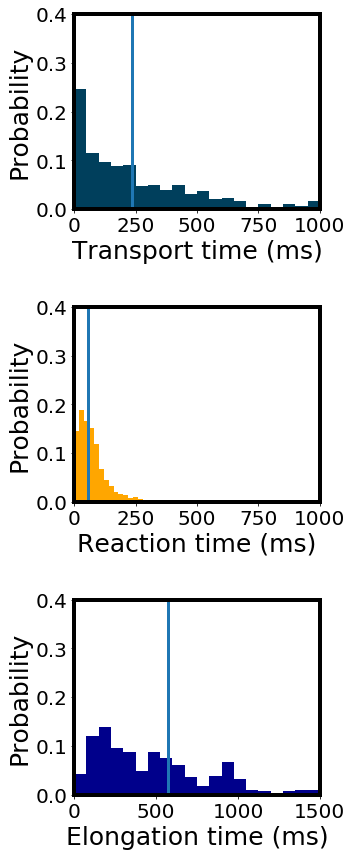

In [228]:
from IPython.core.display import display, HTML
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl

%matplotlib inline
%load_ext autoreload
%autoreload

fig,[ax1,ax2,ax3] = plt.subplots(3,1,figsize=(5,12))
transport_hist = np.histogram(transportT_arr[0:16],bins=20,range=(0,1000),weights=bias[0:16])
ax1.bar(transport_hist[1][0:-1],transport_hist[0]/sum(transport_hist[0]),align='edge',width=50,color='#003f5c')
ax1.set_xlim(0,1000)
ax1.set_ylim(0,0.4)
ax1.set_ylabel('Probability',size=25)
ax1.set_xlabel('Transport time (ms)',size=25)
total = 0
for i, t_bin in enumerate(transportT_arr):
    total+= sum((np.array(transportT_arr[i])*bias[i])/len(bias[i]))
print(total)
ax1.plot([total]*2,[0,0.4],linewidth=3)


reaction_hist = np.histogram(rxnT_arr[0:1],bins=20,range=(0,400),weights=bias_rxn[0:1])
ax2.bar(reaction_hist[1][0:-1],reaction_hist[0]/sum(reaction_hist[0]),align='edge',width=400/20,color='#ffa600')
ax2.set_xlim(0,1000)
ax2.set_ylim(0,0.4)
ax2.set_ylabel('Probability',size=25)
ax2.set_xlabel('Reaction time (ms)',size=25)
total = 0
for i, t_bin in enumerate(rxnT_arr[0:16]):
    total+= sum((np.array(rxnT_arr[i])*bias_rxn[i])/len(bias_rxn[i]))
total+=p_codon_count_hist_weighted_avg[0]*(1000/1475+1000/1529+1000/209+1000/200+1000/32)
print(total)
ax2.plot([total]*2,[0,0.4],linewidth=3)

elongation_hist = np.histogram(elongation_times_exp,bins=20,range=(0,1500))

ax3.bar(elongation_hist[1][0:-1],elongation_hist[0]/sum(elongation_hist[0]),align='edge',width=1500/20,color='darkblue')
ax3.set_xlim(0,1500)
ax3.set_ylim(0,0.4)
ax3.set_ylabel('Probability',size=25)
ax3.set_xlabel('Elongation time (ms)',size=25)
ax3.plot([np.average(elongation_times_exp)]*2,[0,0.4],linewidth=3)
print(np.average(elongation_times_exp))


for _,axes in enumerate([ax1,ax2,ax3]):
    axes.spines['left'].set_linewidth(4)
    axes.spines['bottom'].set_linewidth(4)
    axes.spines['top'].set_linewidth(4)
    axes.spines['right'].set_linewidth(4)
    axes.tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)